In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
import lightgbm as lgb
import xgboost as xgb
from sklearn.feature_selection import mutual_info_classif

from skfeature.function.similarity_based import fisher_score
from matplotlib.pyplot import figure

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import roc_curve, auc

# Loading Data

In [2]:
df = pd.read_csv("../datasets/Thesis_dataset.csv",header=None)

df = df.drop([0])

df.set_axis(['Fetal age','General menstrual cyclic status of mother','Type of pregnancy','Blood serotype of mother',
              'Past delivery number','Number of abortions','Diabetics history','Hypertension','Other illness',
             'Operation history','Presence of disabled childeren',
             'Presence of disabled children in father family','Covid history','Previous child home or hospital delivery',
            'Any other illness','Status'],axis=1,inplace=True)
df.shape

(183, 16)

In [3]:
df['Status'].value_counts()

0    150
1     33
Name: Status, dtype: int64

In [4]:
df.head()

,Fetal age,General menstrual cyclic status of mother,Type of pregnancy,Blood serotype of mother,Past delivery number,Number of abortions,Diabetics history,Hypertension,Other illness,Operation history,Presence of disabled childeren,Presence of disabled children in father family,Covid history,Previous child home or hospital delivery,Any other illness,Status
1,15,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0
2,14,1,0,3,0,0,0,0,0,1,0,0,0,0,1,0
3,7,0,0,4,1,0,1,1,0,0,0,0,0,0,0,0
4,8,1,0,2,1,0,1,0,0,1,0,0,0,1,0,1
5,9,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0


# Data preprocessing

In [5]:
y = df['Status'].values

In [6]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
Y = labelEncoder.fit_transform(y)

In [7]:
X_ = df.drop(["Status"],axis=1)
# X_ = X.to_numpy()

In [8]:
feature_names = np.array(X_.columns)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_)
X = scaler.transform(X_)

In [10]:
X.shape

(183, 15)

# Load the separate test data

In [11]:
test = pd.read_csv("../datasets/test_dataset.csv",header=None)

test= test.drop([0])

test.set_axis(['Fetal age','General menstrual cyclic status of mother','Type of pregnancy','Blood serotype of mother',
              'Past delivery number','Number of abortions','Diabetics history','Hypertension','Other illness',
             'Operation history','Presence of disabled childeren',
             'Presence of disabled children in father family','Covid history','Previous child home or hospital delivery',
            'Any other illness','Status'],axis=1,inplace=True)

In [12]:
test['Status'].value_counts()

0    24
1     6
Name: Status, dtype: int64

In [13]:
Y_t = test['Status'].values

labelEncoder = LabelEncoder()
Y_ = labelEncoder.fit_transform(Y_t)

X_ = test.drop(["Status"],axis=1)

scaler = StandardScaler()
scaler.fit(X_)
T = scaler.transform(X_)

T.shape

(30, 15)

# Train-Test split

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

# Feature selection

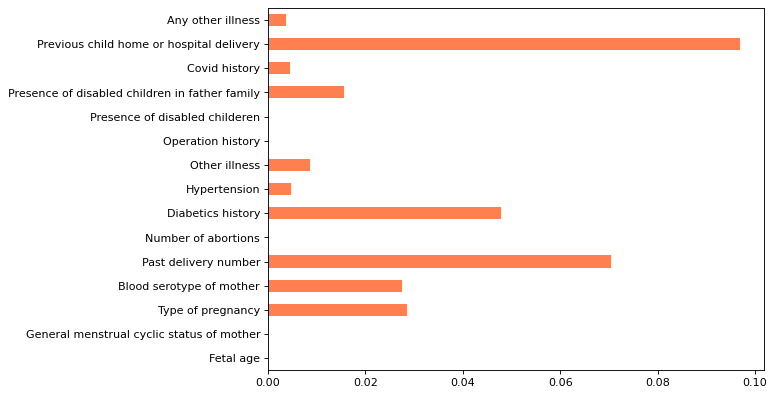

In [15]:
importances = mutual_info_classif(X,Y)

figure(figsize=(8, 6), dpi=80)
feat_importance = pd.Series(importances,df.columns[0:15])
feat_importance.plot(kind='barh',color='coral')
plt.show()

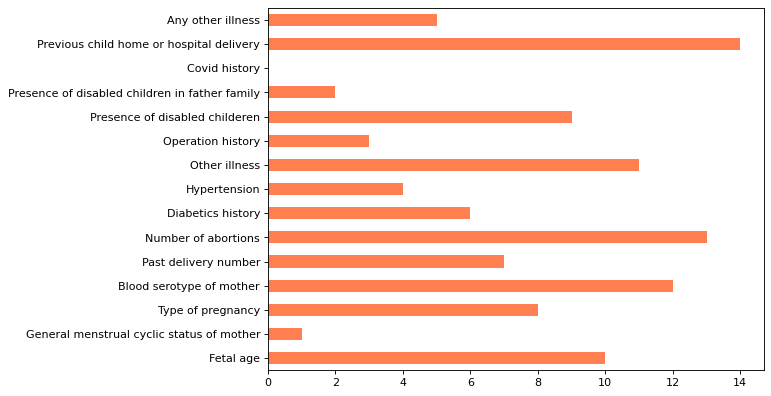

In [16]:
ranks = fisher_score.fisher_score(X,Y)

figure(figsize=(8, 6), dpi=80)
feat_importance = pd.Series(ranks,df.columns[0:15])
feat_importance.plot(kind='barh',color='coral')
plt.show()

# K-fold data

In [17]:
def avg(lst):
    return sum(lst) / len(lst)

In [18]:
kf = StratifiedKFold(n_splits=10)

x_train = []
x_test = []

y_train = []
y_test = []



for train, test in kf.split(X,Y):
    print('train: %s, test: %s' % (X[train].shape, X[test].shape))
    
    x_train.append(X[train])
    x_test.append(X[test])
    
    y_train.append(Y[train])
    y_test.append(Y[test])
    

train: (164, 15), test: (19, 15)
train: (164, 15), test: (19, 15)
train: (164, 15), test: (19, 15)
train: (165, 15), test: (18, 15)
train: (165, 15), test: (18, 15)
train: (165, 15), test: (18, 15)
train: (165, 15), test: (18, 15)
train: (165, 15), test: (18, 15)
train: (165, 15), test: (18, 15)
train: (165, 15), test: (18, 15)


In [19]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


fold_1_train  = x_train[0][:][:]
fold_1_test  = x_test[0][:][:]

fold_1_train_l  = y_train[0][:][:]
fold_1_test_l  = y_test[0][:][:]       


fold_2_train  = x_train[1][:][:]
fold_2_test  = x_test[1][:][:]

fold_2_train_l  = y_train[1][:][:]
fold_2_test_l  = y_test[1][:][:]


fold_3_train  = x_train[2][:][:]
fold_3_test  = x_test[2][:][:]

fold_3_train_l  = y_train[2][:][:]
fold_3_test_l  = y_test[2][:][:]

fold_4_train  = x_train[3][:][:]
fold_4_test  = x_test[3][:][:]

fold_4_train_l  = y_train[3][:][:]
fold_4_test_l  = y_test[3][:][:]


fold_5_train  = x_train[4][:][:]
fold_5_test  = x_test[4][:][:]

fold_5_train_l  = y_train[4][:][:]
fold_5_test_l  = y_test[4][:][:]


fold_6_train  = x_train[5][:][:]
fold_6_test  = x_test[5][:][:]

fold_6_train_l  = y_train[5][:][:]
fold_6_test_l  = y_test[5][:][:]

fold_7_train  = x_train[6][:][:]
fold_7_test  = x_test[6][:][:]

fold_7_train_l  = y_train[6][:][:]
fold_7_test_l  = y_test[6][:][:]

fold_8_train  = x_train[7][:][:]
fold_8_test  = x_test[7][:][:]

fold_8_train_l  = y_train[7][:][:]
fold_8_test_l  = y_test[7][:][:]

fold_9_train  = x_train[8][:][:]
fold_9_test  = x_test[8][:][:]

fold_9_train_l  = y_train[8][:][:]
fold_9_test_l  = y_test[8][:][:]

fold_10_train  = x_train[9][:][:]
fold_10_test  = x_test[9][:][:]

fold_10_train_l  = y_train[9][:][:]
fold_10_test_l  = y_test[9][:][:]
        
    
# print(fold_1_train.shape)
# print(fold_2_train.shape)
# print(fold_3_train.shape)
# print(fold_4_train.shape)
# print(fold_5_train.shape)
# print(fold_6_train.shape)
# print(fold_7_train.shape)
# print(fold_8_train.shape)
# print(fold_9_train.shape)
# print(fold_10_train.shape)


<ipython-input-19-5cc2a5537827>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array(x_train)
<ipython-input-19-5cc2a5537827>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test = np.array(x_test)
<ipython-input-19-5cc2a5537827>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_train = np.array(y_train)
<ipython-

# K-fold cross validation

Logistic regression

In [20]:
arr = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, Y,cv=10)
avg_score = avg(arr)
print(arr)
print('\n',avg_score)

[0.57894737 0.68421053 0.63157895 0.88888889 0.83333333 0.83333333
 0.88888889 0.83333333 0.83333333 0.88888889]

 0.7894736842105263


Decision Tree

In [21]:
arr = cross_val_score(DecisionTreeClassifier(random_state=0), X, Y,cv=10)
avg_score = avg(arr)
print(arr)
print('\n',avg_score)

[0.52631579 0.73684211 0.63157895 0.83333333 0.72222222 0.72222222
 0.88888889 0.88888889 0.83333333 0.83333333]

 0.7616959064327485


Random Forest

In [22]:
arr = cross_val_score(RandomForestClassifier(max_depth=4, random_state=4), X, Y,cv=10)
avg_score = avg(arr)
print(arr)
print('\n',avg_score)

[0.78947368 0.84210526 0.73684211 0.83333333 0.83333333 0.88888889
 0.88888889 0.83333333 0.83333333 0.88888889]

 0.8368421052631578


K nearest neighbors

In [23]:
arr = cross_val_score(KNeighborsClassifier(n_neighbors=19), X, Y,cv=10)
avg_score = avg(arr)
print(arr)
print('\n',avg_score)

[0.78947368 0.78947368 0.73684211 0.83333333 0.77777778 0.88888889
 0.88888889 0.83333333 0.83333333 0.94444444]

 0.8315789473684211


Linear Regression

In [114]:
arr = cross_val_score(LinearRegression(),X, Y,cv=10)
avg_score = avg(arr)
print(arr)
print('\n',avg_score)

[-0.15244467 -0.00854888 -0.81956064  0.42674175 -0.03364842  0.02950503
  0.30474921  0.30629466  0.00937815  0.50707021]

 0.05695364015432547


Support vector machine

In [25]:
arr = cross_val_score(SVC(kernel="linear",random_state=4), X, Y,cv=10)
avg_score = avg(arr)
print(arr)
print('\n',avg_score)

[0.52631579 0.73684211 0.52631579 0.83333333 0.77777778 0.77777778
 0.88888889 0.83333333 0.77777778 0.88888889]

 0.7567251461988305


LightGBM

In [26]:
lgb_clf = lgb.LGBMClassifier(learning_rate = 0.05, boosting_type = 'DART',
                  objective='binary',
                  metric = ['auc','binary_logloss'],
                  num_leaves=10,
                  max_depth=50 )

In [27]:
lgb_clf.fit(X_train,Y_train)

LGBMClassifier(boosting_type='DART', learning_rate=0.05, max_depth=50,
               metric=['auc', 'binary_logloss'], num_leaves=10,
               objective='binary')

In [28]:
arr = cross_val_score(lgb_clf , X, Y,cv=10)
avg_score = avg(arr)
print(arr)
print('\n',avg_score)

[0.78947368 0.78947368 0.63157895 0.77777778 0.77777778 0.83333333
 0.94444444 0.83333333 0.83333333 0.83333333]

 0.8043859649122806


# Helper functions

In [29]:
def predicted_class(test_data,prediction,threshold):
    
    pred = []
    
    for i in range(0,len(test_data)):
        if prediction[i]>=threshold:
            pred.append(1)
        else:
            pred.append(0)
            
    return pred

In [30]:
def generate_cm(clf,X_train,Y_train,X_test,Y_test,threshold):

    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)

    pred = predicted_class(Y_test,pred,threshold)

    confusionMatrix  = metrics.confusion_matrix(Y_test,pred)
    sns.heatmap(confusionMatrix,annot=True)
    plt.title('Confusion Matrix\n', fontsize = 20)
    plt.show()

# Logistic Regression

In [31]:
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)

In [32]:
y_pred_logistic = clf.predict(X_test)

In [33]:
clf.score(X_test,Y_test)

0.8378378378378378

# Decision Tree

In [34]:
decision_tress_clf = DecisionTreeClassifier(random_state=0)

In [35]:
decision_tress_clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [36]:
y_pred_tree = decision_tress_clf.predict(X_test)

In [37]:
decision_tress_clf.score(X_test, Y_test)

0.6756756756756757

# Random forest

In [38]:
rand_forest_clf = RandomForestClassifier(max_depth=4, random_state=4)
rand_forest_clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, random_state=4)

In [39]:
rand_forest_clf.score(X_test, Y_test)

0.8918918918918919

In [40]:
rand_forest_pred = rand_forest_clf.predict(X_test)

# K-nearest neighbors

In [41]:
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [42]:
KNN_pred = neigh.predict(X_test)

In [43]:
neigh.score(X_test, Y_test)

0.8648648648648649

# Linear Regression 

In [44]:
reg_clf = LinearRegression().fit(X_train, Y_train)

In [45]:
y_pred_reg = reg_clf.predict(X_test)

In [46]:
pred_reg = []

for i in range(0,len(Y_test)):
    if y_pred_reg[i]>= 0.25:
        pred_reg.append(1)
    else:
        pred_reg.append(0)

# Testing the Linear Regression Model

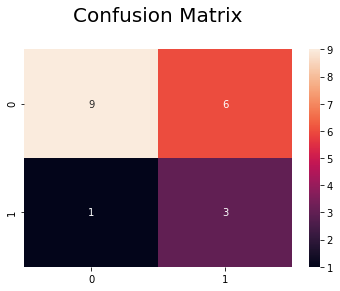

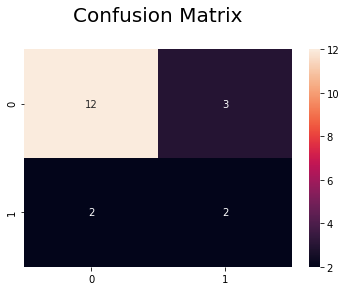

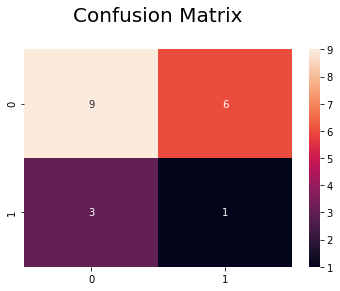

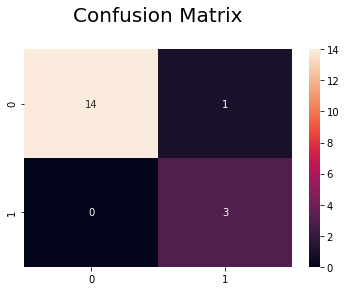

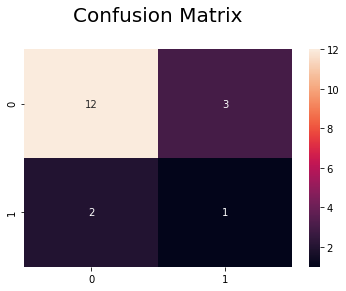

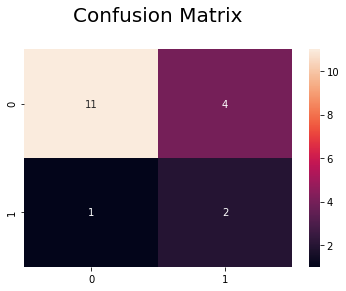

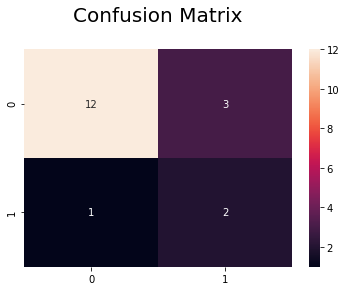

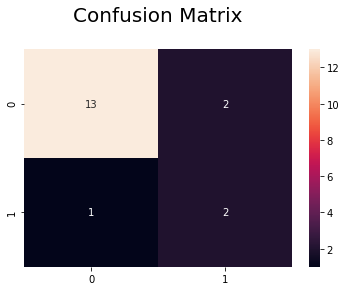

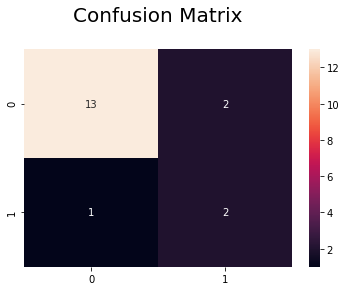

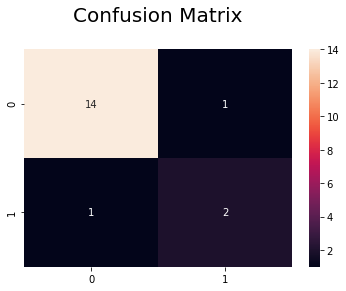

In [47]:
generate_cm(reg_clf,fold_1_train,fold_1_train_l,fold_1_test,fold_1_test_l,0.25)
generate_cm(reg_clf,fold_2_train,fold_2_train_l,fold_2_test,fold_2_test_l,0.25)
generate_cm(reg_clf,fold_3_train,fold_3_train_l,fold_3_test,fold_3_test_l,0.25)
generate_cm(reg_clf,fold_4_train,fold_4_train_l,fold_4_test,fold_4_test_l,0.25)
generate_cm(reg_clf,fold_5_train,fold_5_train_l,fold_5_test,fold_5_test_l,0.25)
    
generate_cm(reg_clf,fold_6_train,fold_6_train_l,fold_6_test,fold_6_test_l,0.25)
generate_cm(reg_clf,fold_7_train,fold_7_train_l,fold_7_test,fold_7_test_l,0.25)
generate_cm(reg_clf,fold_8_train,fold_8_train_l,fold_8_test,fold_8_test_l,0.25)
generate_cm(reg_clf,fold_9_train,fold_9_train_l,fold_9_test,fold_9_test_l,0.25)
generate_cm(reg_clf,fold_10_train,fold_10_train_l,fold_10_test,fold_10_test_l,0.25)

              precision    recall  f1-score   support

           0       0.96      0.77      0.85        30
           1       0.46      0.86      0.60         7

    accuracy                           0.78        37
   macro avg       0.71      0.81      0.73        37
weighted avg       0.86      0.78      0.80        37



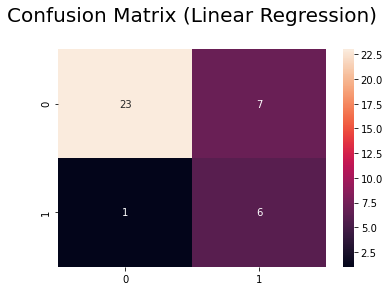

In [48]:
svm_confusionMatrix  = metrics.confusion_matrix(Y_test,pred_reg)
print(metrics.classification_report(Y_test,pred_reg))
sns.heatmap(svm_confusionMatrix,annot=True)
plt.title('Confusion Matrix (Linear Regression)\n', fontsize = 20)
plt.show()

# SVM model

In [49]:
svm_clf = SVC(kernel="linear",random_state=4)
svm_clf.fit(X_train, Y_train)

SVC(kernel='linear', random_state=4)

In [50]:
y_pred_svm = svm_clf.decision_function(X_test)

In [51]:
pred_svm = []
for i in range(0,len(Y_test)):
    if y_pred_svm[i]>=-0.874056:
        pred_svm.append(1)
    else:
        pred_svm.append(0)

In [52]:
def generate_cm_svm(clf,X_train,Y_train,X_test,Y_test,threshold):

    clf.fit(X_train, Y_train)
    pred = clf.decision_function(X_test)
    pred = predicted_class(Y_test,pred,threshold)

    confusionMatrix  = metrics.confusion_matrix(Y_test,pred)
    sns.heatmap(confusionMatrix,annot=True)
    plt.title('Confusion Matrix(LightGbm)\n', fontsize = 20)
    plt.show()

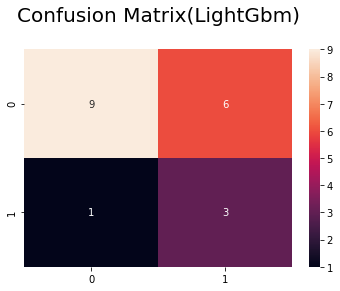

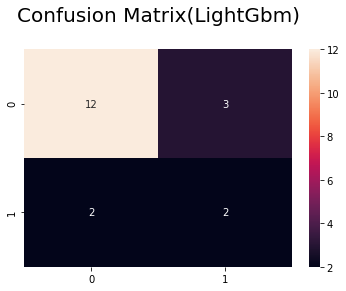

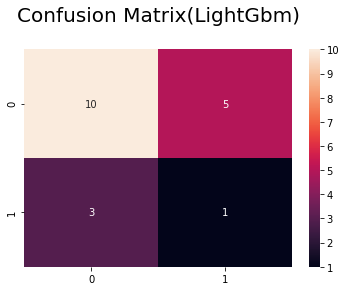

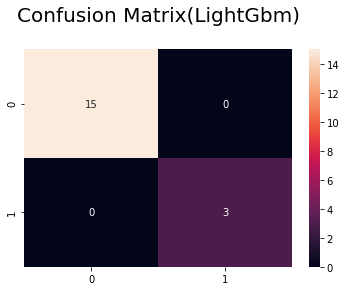

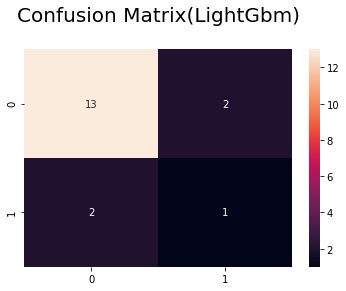

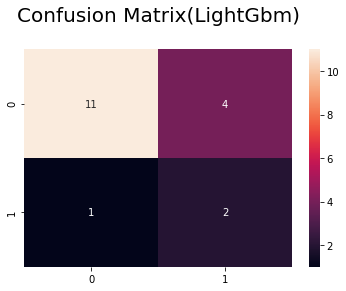

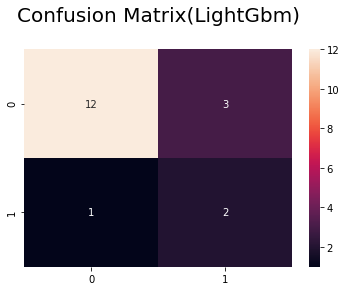

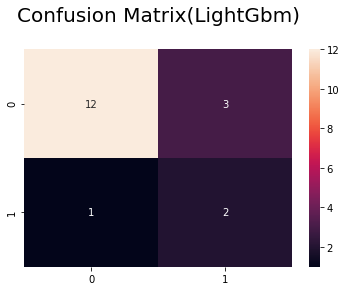

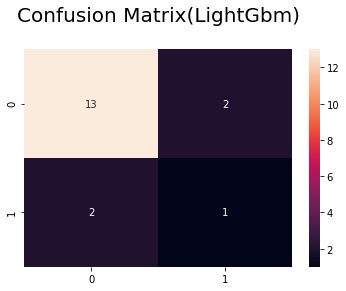

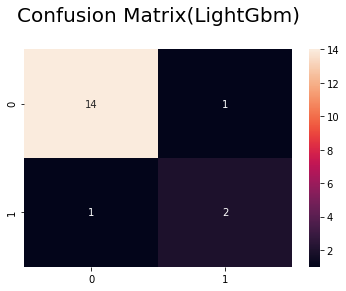

In [53]:
generate_cm_svm(svm_clf,fold_1_train,fold_1_train_l,fold_1_test,fold_1_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_2_train,fold_2_train_l,fold_2_test,fold_2_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_3_train,fold_3_train_l,fold_3_test,fold_3_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_4_train,fold_4_train_l,fold_4_test,fold_4_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_5_train,fold_5_train_l,fold_5_test,fold_5_test_l,-0.865222)
    
generate_cm_svm(svm_clf,fold_6_train,fold_6_train_l,fold_6_test,fold_6_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_7_train,fold_7_train_l,fold_7_test,fold_7_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_8_train,fold_8_train_l,fold_8_test,fold_8_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_9_train,fold_9_train_l,fold_9_test,fold_9_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_10_train,fold_10_train_l,fold_10_test,fold_10_test_l,-0.865222)

# SVM on Separate Test Data

In [54]:
y_pred_svm_test = svm_clf.decision_function(T)

In [55]:
pred_svm_test = predicted_class(Y_,y_pred_svm_test,-0.865222)

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        24
           1       0.20      0.17      0.18         6

    accuracy                           0.70        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.68      0.70      0.69        30



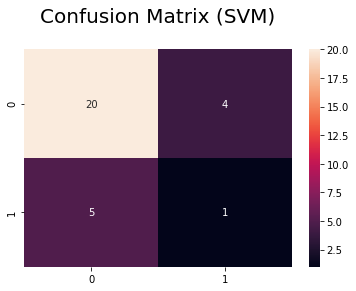

In [56]:
svm_confusionMatrix  = metrics.confusion_matrix(Y_,pred_svm_test)
print(metrics.classification_report(Y_,pred_svm_test))
sns.heatmap(svm_confusionMatrix,annot=True)
plt.title('Confusion Matrix (SVM)\n', fontsize = 20)
plt.show()

# Lgbm Model

In [57]:
lgb_clf = lgb.LGBMRegressor(learning_rate = 0.05, boosting_type = 'DART',
                  objective='binary',
                  metric = ['auc','binary_logloss'],
                  num_leaves=10,
                  max_depth=50 )

# Testing the Lgbm Model

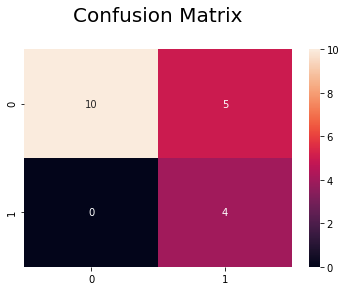

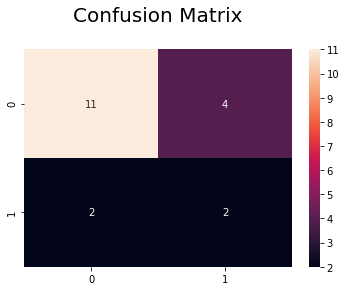

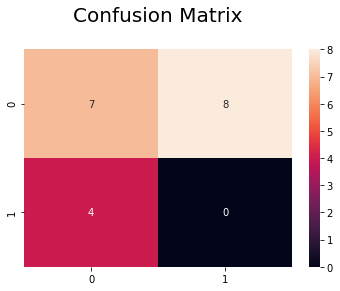

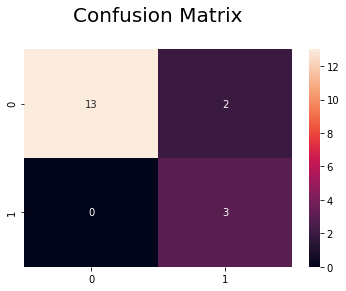

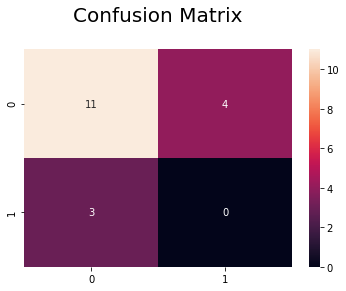

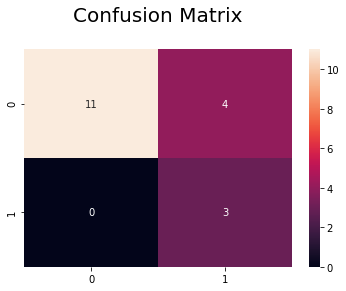

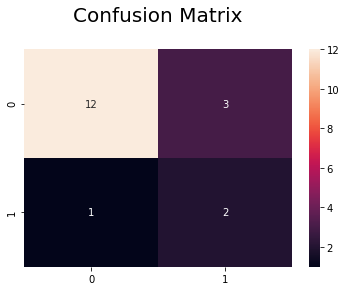

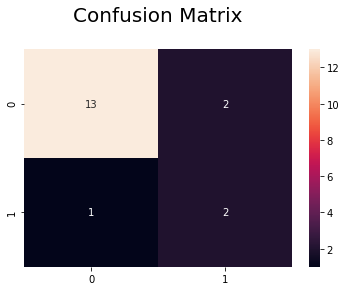

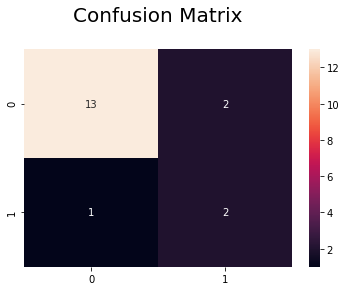

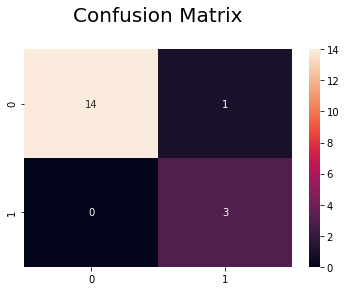

In [58]:
generate_cm(lgb_clf,fold_1_train,fold_1_train_l,fold_1_test,fold_1_test_l,0.27)
generate_cm(lgb_clf,fold_2_train,fold_2_train_l,fold_2_test,fold_2_test_l,0.27)
generate_cm(lgb_clf,fold_3_train,fold_3_train_l,fold_3_test,fold_3_test_l,0.27)
generate_cm(lgb_clf,fold_4_train,fold_4_train_l,fold_4_test,fold_4_test_l,0.27)
generate_cm(lgb_clf,fold_5_train,fold_5_train_l,fold_5_test,fold_5_test_l,0.27)
    
generate_cm(lgb_clf,fold_6_train,fold_6_train_l,fold_6_test,fold_6_test_l,0.27)
generate_cm(lgb_clf,fold_7_train,fold_7_train_l,fold_7_test,fold_7_test_l,0.27)
generate_cm(lgb_clf,fold_8_train,fold_8_train_l,fold_8_test,fold_8_test_l,0.27)
generate_cm(lgb_clf,fold_9_train,fold_9_train_l,fold_9_test,fold_9_test_l,0.27)
generate_cm(lgb_clf,fold_10_train,fold_10_train_l,fold_10_test,fold_10_test_l,0.27)

In [59]:
y_pred_lgbm = lgb_clf.predict(X_test)

In [60]:
pred_lgbm = []

for i in range(0,len(X_test)):
    if y_pred_lgbm[i]>=0.27:
        pred_lgbm.append(1)
    else:
        pred_lgbm.append(0)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        30
           1       0.58      1.00      0.74         7

    accuracy                           0.86        37
   macro avg       0.79      0.92      0.82        37
weighted avg       0.92      0.86      0.88        37



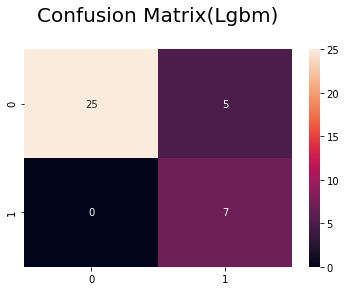

In [61]:
lgbm_confusionMatrix  = metrics.confusion_matrix(Y_test,pred_lgbm)
print(metrics.classification_report(Y_test,pred_lgbm))

sns.heatmap(lgbm_confusionMatrix,annot=True)
plt.title('Confusion Matrix(Lgbm)\n', fontsize = 20)
plt.show()

# Lgbm on separate test data

In [62]:
y_pred_lgbm_test = lgb_clf.predict(T)

In [63]:
pred_lgbm_test = predicted_class(Y_,y_pred_lgbm_test,0.27)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.40      0.67      0.50         6

    accuracy                           0.73        30
   macro avg       0.65      0.71      0.66        30
weighted avg       0.80      0.73      0.75        30



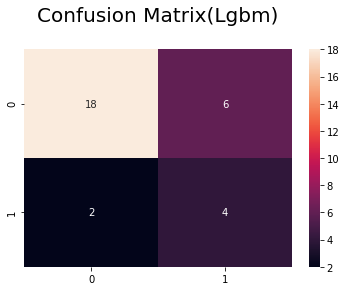

In [64]:
rand_forest_confusionMatrix  = metrics.confusion_matrix(Y_,pred_lgbm_test)
print(metrics.classification_report(Y_,pred_lgbm_test))

sns.heatmap(rand_forest_confusionMatrix,annot=True)
plt.title('Confusion Matrix(Lgbm)\n', fontsize = 20)
plt.show()

# XGboost

In [65]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',seed=42,booster='gblinear',learning_rate=0.01,eval_metric = 'auc',use_label_encoder=False)

clf_xgb.fit(X_train,
            Y_train,
            verbose=True,
)

score_arr =  cross_val_score(clf_xgb, X, Y,cv=10)

In [66]:
y_pred_boost = clf_xgb.predict(X_test)

# CNN

In [67]:
model = keras.models.Sequential([
                    keras.layers.Input(shape=X_train.shape[1], name='input'),
                    keras.layers.Dense(64, activation='relu'),
                    keras.layers.Dense(64, activation='relu'),
                    keras.layers.Dense(2, activation='softmax', name='output')
                    ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1024      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
output (Dense)               (None, 2)                 130       
Total params: 5,314
Trainable params: 5,314
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(
            loss='sparse_categorical_crossentropy',
            optimizer='sgd',
            metrics= ['accuracy']
            )

In [69]:
history = model.fit(X_train, Y_train, epochs=130, validation_split=0.2)

Epoch 1/130
4/4 [==============================] - 0s 32ms/step - loss: 0.9187 - accuracy: 0.2328 - val_loss: 0.9721 - val_accuracy: 0.1000
Epoch 2/130
4/4 [==============================] - 0s 3ms/step - loss: 0.8064 - accuracy: 0.4655 - val_loss: 0.8374 - val_accuracy: 0.3000
Epoch 3/130
4/4 [==============================] - 0s 4ms/step - loss: 0.7228 - accuracy: 0.6293 - val_loss: 0.7357 - val_accuracy: 0.6667
Epoch 4/130
4/4 [==============================] - 0s 4ms/step - loss: 0.6616 - accuracy: 0.6638 - val_loss: 0.6507 - val_accuracy: 0.7000
Epoch 5/130
4/4 [==============================] - 0s 3ms/step - loss: 0.6142 - accuracy: 0.7328 - val_loss: 0.5944 - val_accuracy: 0.7667
Epoch 6/130
4/4 [==============================] - 0s 4ms/step - loss: 0.5814 - accuracy: 0.7328 - val_loss: 0.5505 - val_accuracy: 0.7667
Epoch 7/130
4/4 [==============================] - 0s 4ms/step - loss: 0.5571 - accuracy: 0.7586 - val_loss: 0.5145 - val_accuracy: 0.8333
Epoch 8/130
4/4 [=========

4/4 [==============================] - 0s 3ms/step - loss: 0.3909 - accuracy: 0.8448 - val_loss: 0.2662 - val_accuracy: 0.9333
Epoch 60/130
4/4 [==============================] - 0s 3ms/step - loss: 0.3896 - accuracy: 0.8448 - val_loss: 0.2655 - val_accuracy: 0.9333
Epoch 61/130
4/4 [==============================] - 0s 3ms/step - loss: 0.3888 - accuracy: 0.8448 - val_loss: 0.2644 - val_accuracy: 0.9333
Epoch 62/130
4/4 [==============================] - 0s 3ms/step - loss: 0.3875 - accuracy: 0.8448 - val_loss: 0.2637 - val_accuracy: 0.9333
Epoch 63/130
4/4 [==============================] - 0s 3ms/step - loss: 0.3861 - accuracy: 0.8448 - val_loss: 0.2626 - val_accuracy: 0.9333
Epoch 64/130
4/4 [==============================] - 0s 3ms/step - loss: 0.3850 - accuracy: 0.8448 - val_loss: 0.2622 - val_accuracy: 0.9333
Epoch 65/130
4/4 [==============================] - 0s 3ms/step - loss: 0.3844 - accuracy: 0.8448 - val_loss: 0.2620 - val_accuracy: 0.9333
Epoch 66/130
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 0.3331 - accuracy: 0.8793 - val_loss: 0.2338 - val_accuracy: 0.9333
Epoch 118/130
4/4 [==============================] - 0s 3ms/step - loss: 0.3319 - accuracy: 0.8793 - val_loss: 0.2354 - val_accuracy: 0.9333
Epoch 119/130
4/4 [==============================] - 0s 3ms/step - loss: 0.3314 - accuracy: 0.8793 - val_loss: 0.2380 - val_accuracy: 0.9333
Epoch 120/130
4/4 [==============================] - 0s 3ms/step - loss: 0.3295 - accuracy: 0.8793 - val_loss: 0.2386 - val_accuracy: 0.9333
Epoch 121/130
4/4 [==============================] - 0s 3ms/step - loss: 0.3291 - accuracy: 0.8793 - val_loss: 0.2389 - val_accuracy: 0.9333
Epoch 122/130
4/4 [==============================] - 0s 3ms/step - loss: 0.3280 - accuracy: 0.8793 - val_loss: 0.2380 - val_accuracy: 0.9333
Epoch 123/130
4/4 [==============================] - 0s 3ms/step - loss: 0.3270 - accuracy: 0.8793 - val_loss: 0.2383 - val_accuracy: 0.9333
Epoch 124/130
4/4 [========

In [70]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

2/2 [==============================] - 0s 500us/step - loss: 0.3587 - accuracy: 0.8108

Test Accuracy: 0.8108108043670654

Test Loss: 0.3586685061454773


In [71]:
y_pred_cnn = model.predict(X_test)

cnn_pred = []
for i in range(len(X_test)):
    cnn_pred.append(np.argmax(y_pred_cnn[i]))

====================================================Accuracy Score========================================================

# Accuracy score

In [72]:
print("Accuracy score of lgbm: ",metrics.accuracy_score(Y_test, pred_lgbm))
print("Accuracy score of svm: ",metrics.accuracy_score(Y_test, pred_svm))
print("Accuracy score of linear regression: ",metrics.accuracy_score(Y_test, pred_reg))

print("Accuracy score of KNN: ",metrics.accuracy_score(Y_test, KNN_pred))
print("Accuracy score of logistic regression: ",metrics.accuracy_score(Y_test, y_pred_logistic))
print("Accuracy score of decision tree: ",metrics.accuracy_score(Y_test, y_pred_tree))

print("Accuracy score of random forest: ",metrics.accuracy_score(Y_test, rand_forest_pred))
print("Accuracy score of Xgboost: ",metrics.accuracy_score(Y_test, y_pred_boost))
print("Accuracy score of CNN: ",metrics.accuracy_score(Y_test, cnn_pred))

Accuracy score of lgbm:  0.8648648648648649
Accuracy score of svm:  0.8108108108108109
Accuracy score of linear regression:  0.7837837837837838
Accuracy score of KNN:  0.8648648648648649
Accuracy score of logistic regression:  0.8378378378378378
Accuracy score of decision tree:  0.6756756756756757
Accuracy score of random forest:  0.8918918918918919
Accuracy score of Xgboost:  0.8108108108108109
Accuracy score of CNN:  0.8108108108108109


# Probabilities 

In [73]:
knn_pred_proba = neigh.predict_proba(X_test)[:,1]
log_pred_proba = clf.decision_function(X_test)
tree_pred_proba = decision_tress_clf.predict_proba(X_test)[:,1]
rand_pred_proba = rand_forest_clf.predict_proba(X_test)[:,1]
boost_pred_proba = clf_xgb.predict_proba(X_test)[:,1]
cnn_pred_proba = model.predict(X_test)[:,1]

# AUC score

In [74]:
print("AUC scrore for lgbm: ",metrics.roc_auc_score(Y_test,y_pred_lgbm))
print("AUC scrore for SVM: ",metrics.roc_auc_score(Y_test,y_pred_svm))
print("AUC scrore for linear regression: ",metrics.roc_auc_score(Y_test,y_pred_reg))

print("AUC scrore for KNN: ",metrics.roc_auc_score(Y_test,knn_pred_proba))
print("AUC scrore for logistic regression: ",metrics.roc_auc_score(Y_test,log_pred_proba))
print("AUC scrore for decision tree: ",metrics.roc_auc_score(Y_test,tree_pred_proba))

print("AUC scrore for random forest: ",metrics.roc_auc_score(Y_test,rand_pred_proba))
print("AUC scrore for Xgboost: ",metrics.roc_auc_score(Y_test,boost_pred_proba))
print("AUC scrore for CNN: ",metrics.roc_auc_score(Y_test,cnn_pred_proba))

AUC scrore for lgbm:  0.9285714285714286
AUC scrore for SVM:  0.8571428571428571
AUC scrore for linear regression:  0.8761904761904762
AUC scrore for KNN:  0.8357142857142857
AUC scrore for logistic regression:  0.8809523809523809
AUC scrore for decision tree:  0.5261904761904761
AUC scrore for random forest:  0.8523809523809525
AUC scrore for Xgboost:  0.8476190476190476
AUC scrore for CNN:  0.8714285714285714


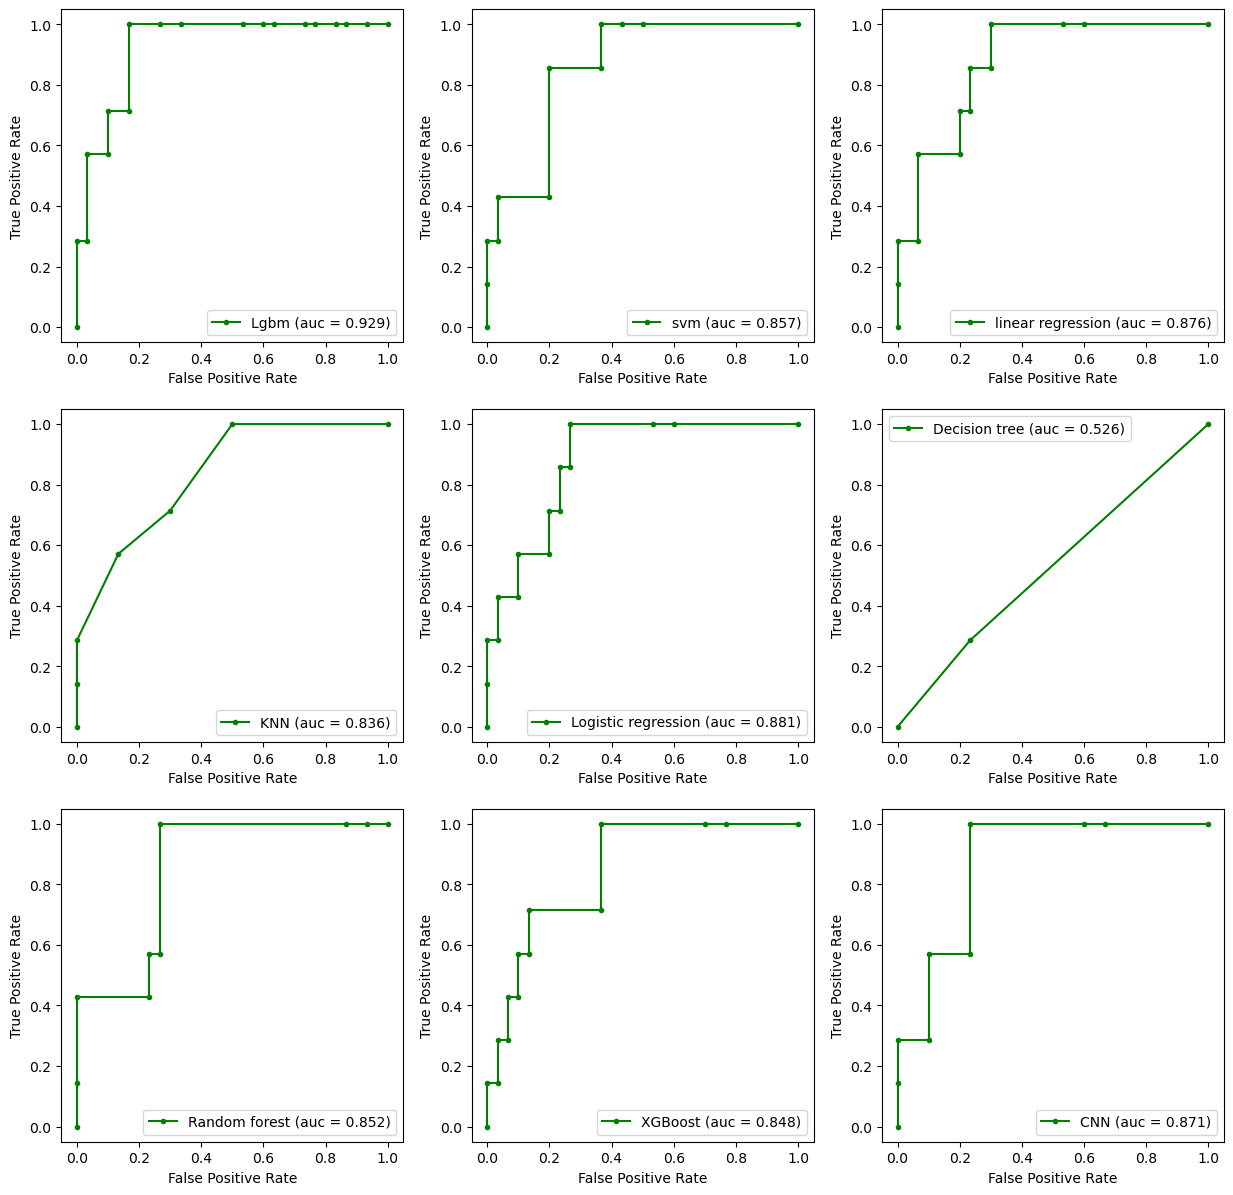

In [75]:
lgbm_fpr,lgbm_tpr, lgbm_threshold = roc_curve(Y_test, y_pred_lgbm)
auc_lgbm = auc(lgbm_fpr, lgbm_tpr)


svm_fpr,svm_tpr, svm_threshold = roc_curve(Y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)


reg_fpr,reg_tpr, reg_threshold = roc_curve(Y_test, y_pred_reg)
auc_reg = auc(reg_fpr, reg_tpr)

knn_fpr,knn_tpr, knn_threshold = roc_curve(Y_test,knn_pred_proba)
auc_knn = auc(knn_fpr, knn_tpr)


log_fpr,log_tpr, log_threshold = roc_curve(Y_test,log_pred_proba)
auc_log = auc(log_fpr, log_tpr)

tree_fpr,tree_tpr, tree_threshold = roc_curve(Y_test, tree_pred_proba)
auc_tree = auc(tree_fpr, tree_tpr)

rand_fpr,rand_tpr, rand_threshold = roc_curve(Y_test, rand_pred_proba)
auc_rand = auc(rand_fpr, rand_tpr)

boost_fpr,boost_tpr, boost_threshold = roc_curve(Y_test, boost_pred_proba)
auc_boost = auc(boost_fpr, boost_tpr)

cnn_fpr,cnn_tpr, cnn_threshold = roc_curve(Y_test, cnn_pred_proba)
auc_cnn = auc(cnn_fpr, cnn_tpr)


plt.figure(figsize=(15, 15), dpi=100)

plt.subplot(3,3,1)
plt.plot(lgbm_fpr, lgbm_tpr, marker='.',color='g', label='Lgbm (auc = %0.3f)' % auc_lgbm)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


plt.subplot(3,3,2)
plt.plot(svm_fpr, svm_tpr, marker='.',color='g', label='svm (auc = %0.3f)' % auc_svm)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


plt.subplot(3,3,3)
plt.plot(reg_fpr, reg_tpr, marker='.',color='g', label='linear regression (auc = %0.3f)' % auc_reg)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


plt.subplot(3,3,4)
plt.plot(knn_fpr, knn_tpr, marker='.',color='g', label='KNN (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


plt.subplot(3,3,5)
plt.plot(log_fpr, log_tpr, marker='.',color='g', label='Logistic regression (auc = %0.3f)' % auc_log)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


plt.subplot(3,3,6)
plt.plot(tree_fpr, tree_tpr, marker='.',color='g', label='Decision tree (auc = %0.3f)' % auc_tree)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


plt.subplot(3,3,7)
plt.plot(rand_fpr, rand_tpr, marker='.',color='g', label='Random forest (auc = %0.3f)' % auc_rand)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


plt.subplot(3,3,8)
plt.plot(boost_fpr, boost_tpr, marker='.',color='g', label='XGBoost (auc = %0.3f)' % auc_boost)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


plt.subplot(3,3,9)
plt.plot(cnn_fpr, cnn_tpr, marker='.',color='g', label='CNN (auc = %0.3f)' % auc_cnn)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

=================================================Confusion Matrix=======================================================

# Confusion matrix (Linear Regression)

              precision    recall  f1-score   support

           0       0.96      0.77      0.85        30
           1       0.46      0.86      0.60         7

    accuracy                           0.78        37
   macro avg       0.71      0.81      0.73        37
weighted avg       0.86      0.78      0.80        37



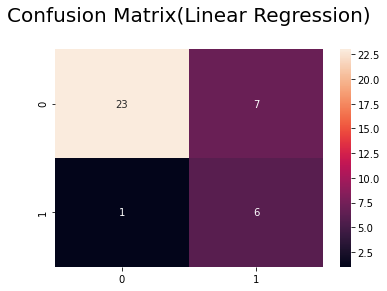

In [76]:
linear_confusionMatrix  = metrics.confusion_matrix(Y_test,pred_reg)
print(metrics.classification_report(Y_test,pred_reg))

sns.heatmap(linear_confusionMatrix,annot=True)
plt.title('Confusion Matrix(Linear Regression)\n', fontsize = 20)
plt.show()

In [77]:
sensitivity_linear = linear_confusionMatrix[0][0]/(linear_confusionMatrix[0][0]+linear_confusionMatrix[0][1])
specificity_linear = linear_confusionMatrix[1][1]/(linear_confusionMatrix[1][1]+linear_confusionMatrix[1][0])
print(sensitivity_linear,specificity_linear)

0.7666666666666667 0.8571428571428571


# Decision Tress

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.22      0.29      0.25         7

    accuracy                           0.68        37
   macro avg       0.52      0.53      0.52        37
weighted avg       0.71      0.68      0.69        37



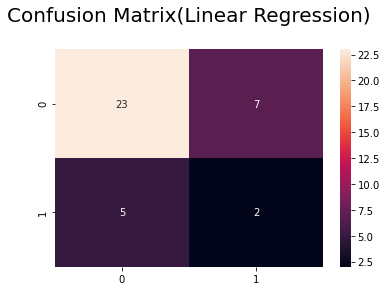

In [78]:
tree_confusionMatrix  = metrics.confusion_matrix(Y_test,y_pred_tree)
print(metrics.classification_report(Y_test,y_pred_tree))

sns.heatmap(tree_confusionMatrix,annot=True)
plt.title('Confusion Matrix(Linear Regression)\n', fontsize = 20)
plt.show()

In [79]:
sensitivity_tree = tree_confusionMatrix[0][0]/(tree_confusionMatrix[0][0]+tree_confusionMatrix[0][1])
specificity_tree = tree_confusionMatrix[1][1]/(tree_confusionMatrix[1][1]+tree_confusionMatrix[1][0])
print(sensitivity_tree,specificity_tree)

0.7666666666666667 0.2857142857142857


# Confusion matrix (logistic regression)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        30
           1       0.57      0.57      0.57         7

    accuracy                           0.84        37
   macro avg       0.74      0.74      0.74        37
weighted avg       0.84      0.84      0.84        37



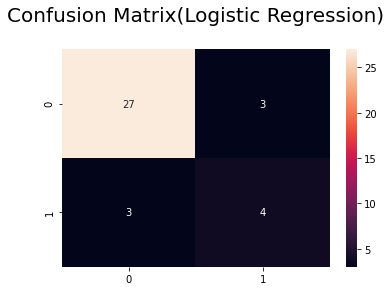

In [80]:
logistic_confusionMatrix  = metrics.confusion_matrix(Y_test,y_pred_logistic)
print(metrics.classification_report(Y_test,y_pred_logistic))

sns.heatmap(logistic_confusionMatrix,annot=True)
plt.title('Confusion Matrix(Logistic Regression)\n', fontsize = 20)
plt.show()

In [81]:
sensitivity_logistic = logistic_confusionMatrix[0][0]/(logistic_confusionMatrix[0][0]+logistic_confusionMatrix[0][1])
specificity_logistic = logistic_confusionMatrix[1][1]/(logistic_confusionMatrix[1][1]+logistic_confusionMatrix[1][0])
print(sensitivity_logistic,specificity_logistic)

0.9 0.5714285714285714


# Confusion matrix (Random Forest)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        30
           1       1.00      0.43      0.60         7

    accuracy                           0.89        37
   macro avg       0.94      0.71      0.77        37
weighted avg       0.90      0.89      0.87        37



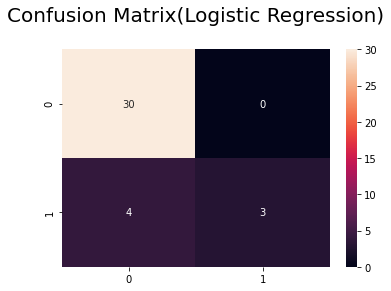

In [82]:
forest_confusionMatrix  = metrics.confusion_matrix(Y_test,rand_forest_pred)
print(metrics.classification_report(Y_test,rand_forest_pred))

sns.heatmap(forest_confusionMatrix,annot=True)
plt.title('Confusion Matrix(Logistic Regression)\n', fontsize = 20)
plt.show()

In [83]:
sensitivity_forest = forest_confusionMatrix[0][0]/(forest_confusionMatrix[0][0]+forest_confusionMatrix[0][1])
specificity_forest = forest_confusionMatrix[1][1]/(forest_confusionMatrix[1][1]+forest_confusionMatrix[1][0])
print(sensitivity_forest,specificity_forest)

1.0 0.42857142857142855


# Confusion matrix (KNN)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        30
           1       1.00      0.29      0.44         7

    accuracy                           0.86        37
   macro avg       0.93      0.64      0.68        37
weighted avg       0.88      0.86      0.83        37



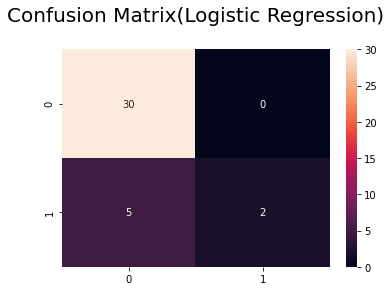

In [84]:
KNN_confusionMatrix  = metrics.confusion_matrix(Y_test,KNN_pred)
print(metrics.classification_report(Y_test,KNN_pred))

sns.heatmap(KNN_confusionMatrix,annot=True)
plt.title('Confusion Matrix(Logistic Regression)\n', fontsize = 20)
plt.show()

In [85]:
sensitivity_KNN = KNN_confusionMatrix[0][0]/(KNN_confusionMatrix[0][0]+KNN_confusionMatrix[0][1])
specificity_KNN = KNN_confusionMatrix[1][1]/(KNN_confusionMatrix[1][1]+KNN_confusionMatrix[1][0])
print(sensitivity_KNN,specificity_KNN)

1.0 0.2857142857142857


# Confusion matrix (Lgbm)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        30
           1       0.58      1.00      0.74         7

    accuracy                           0.86        37
   macro avg       0.79      0.92      0.82        37
weighted avg       0.92      0.86      0.88        37



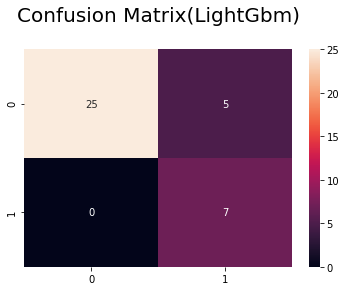

In [86]:
lgbm_confusionMatrix  = metrics.confusion_matrix(Y_test,pred_lgbm)
print(metrics.classification_report(Y_test,pred_lgbm))
sns.heatmap(lgbm_confusionMatrix,annot=True)
plt.title('Confusion Matrix(LightGbm)\n', fontsize = 20)
plt.show()

In [87]:
sensitivity_lgbm = lgbm_confusionMatrix[0][0]/(lgbm_confusionMatrix[0][0]+lgbm_confusionMatrix[0][1])
specificity_lgbm = lgbm_confusionMatrix[1][1]/(lgbm_confusionMatrix[1][1]+lgbm_confusionMatrix[1][0])
print(sensitivity_lgbm,specificity_lgbm)

0.8333333333333334 1.0


# Confusion matrix (SVM)

              precision    recall  f1-score   support

           0       0.96      0.80      0.87        30
           1       0.50      0.86      0.63         7

    accuracy                           0.81        37
   macro avg       0.73      0.83      0.75        37
weighted avg       0.87      0.81      0.83        37



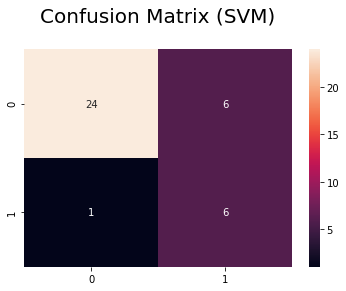

In [88]:
svm_confusionMatrix  = metrics.confusion_matrix(Y_test,pred_svm)
print(metrics.classification_report(Y_test,pred_svm))
sns.heatmap(svm_confusionMatrix,annot=True)
plt.title('Confusion Matrix (SVM)\n', fontsize = 20)
plt.show()

In [89]:
sensitivity_svm = svm_confusionMatrix[0][0]/(svm_confusionMatrix[0][0]+svm_confusionMatrix[0][1])
specificity_svm = svm_confusionMatrix[1][1]/(svm_confusionMatrix[1][1]+svm_confusionMatrix[1][0])
print(sensitivity_svm,specificity_svm)

0.8 0.8571428571428571


# Confusion matrix (XGboost)

              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.50      0.71      0.59         7

    accuracy                           0.81        37
   macro avg       0.71      0.77      0.73        37
weighted avg       0.85      0.81      0.82        37



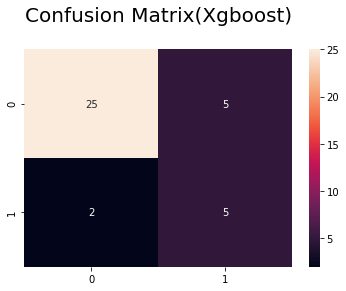

In [90]:
confusionMatrix_boost  = metrics.confusion_matrix(Y_test,y_pred_boost)
print(metrics.classification_report(Y_test,y_pred_boost))

sns.heatmap(confusionMatrix_boost,annot=True)
plt.title('Confusion Matrix(Xgboost)\n', fontsize = 20)
plt.show()

In [91]:
sensitivity_boost = confusionMatrix_boost[0][0]/(confusionMatrix_boost[0][0]+confusionMatrix_boost[0][1])
specificity_boost = confusionMatrix_boost[1][1]/(confusionMatrix_boost[1][1]+confusionMatrix_boost[1][0])
print(sensitivity_boost,specificity_boost)

0.8333333333333334 0.7142857142857143


# Confusion matrix (CNN)

              precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       0.50      0.43      0.46         7

    accuracy                           0.81        37
   macro avg       0.69      0.66      0.67        37
weighted avg       0.80      0.81      0.81        37



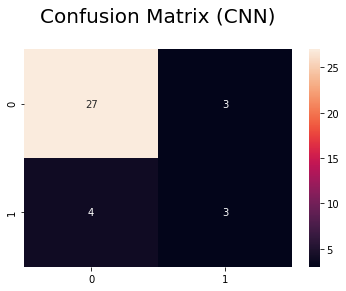

In [92]:
cnn_confusionMatrix  = metrics.confusion_matrix(Y_test,cnn_pred)
print(metrics.classification_report(Y_test,cnn_pred))
sns.heatmap(cnn_confusionMatrix,annot=True)
plt.title('Confusion Matrix (CNN)\n', fontsize = 20)
plt.show()

In [93]:
sensitivity_cnn = cnn_confusionMatrix[0][0]/(cnn_confusionMatrix[0][0]+cnn_confusionMatrix[0][1])
specificity_cnn = cnn_confusionMatrix[1][1]/(cnn_confusionMatrix[1][1]+cnn_confusionMatrix[1][0])
print(sensitivity_cnn,specificity_cnn)

0.9 0.42857142857142855


# ROC Curve

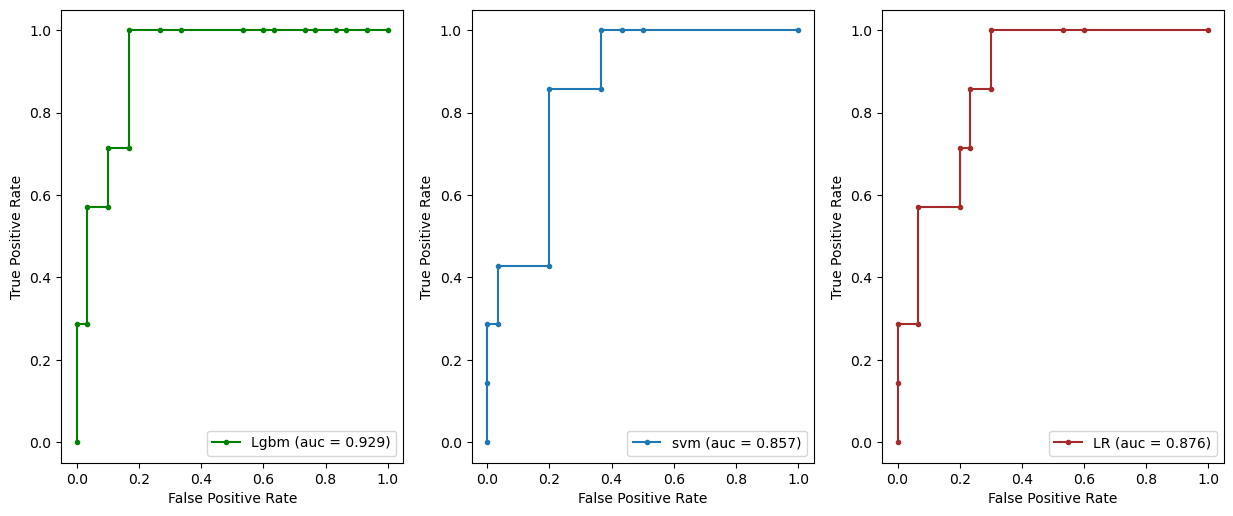

In [94]:
lgbm_fpr,lgbm_tpr, lgbm_threshold = roc_curve(Y_test, y_pred_lgbm)
auc_lgbm = auc(lgbm_fpr, lgbm_tpr)


svm_fpr,svm_tpr, svm_threshold = roc_curve(Y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

reg_fpr,reg_tpr, reg_threshold = roc_curve(Y_test,y_pred_reg)
auc_reg = auc(reg_fpr, reg_tpr)

plt.figure(figsize=(15, 6), dpi=100)

plt.subplot(1,3,1)

plt.plot(lgbm_fpr, lgbm_tpr, marker='.',color='g', label='Lgbm (auc = %0.3f)' % auc_lgbm)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.subplot(1,3,2)
plt.plot(svm_fpr, svm_tpr, marker='.', label='svm (auc = %0.3f)' % auc_svm)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.subplot(1,3,3)
plt.plot(reg_fpr, reg_tpr, marker='.',color='brown', label='LR (auc = %0.3f)' % auc_reg)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [95]:
i = np.arange(len(lgbm_tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(lgbm_tpr-(1-lgbm_fpr), index=i), 'thresholds' : pd.Series(lgbm_threshold, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

Ideal threshold is:  6    0.379798
Name: thresholds, dtype: float64


In [96]:
i = np.arange(len(svm_tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(svm_tpr-(1-svm_fpr), index=i), 'thresholds' : pd.Series(svm_threshold, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

Ideal threshold is:  6   -0.865222
Name: thresholds, dtype: float64


In [97]:

i = np.arange(len(reg_tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(reg_tpr-(1-reg_fpr), index=i), 'thresholds' : pd.Series(reg_threshold, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

Ideal threshold is:  7    0.262111
Name: thresholds, dtype: float64
